In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [2]:
data = pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')

In [3]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [7]:
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

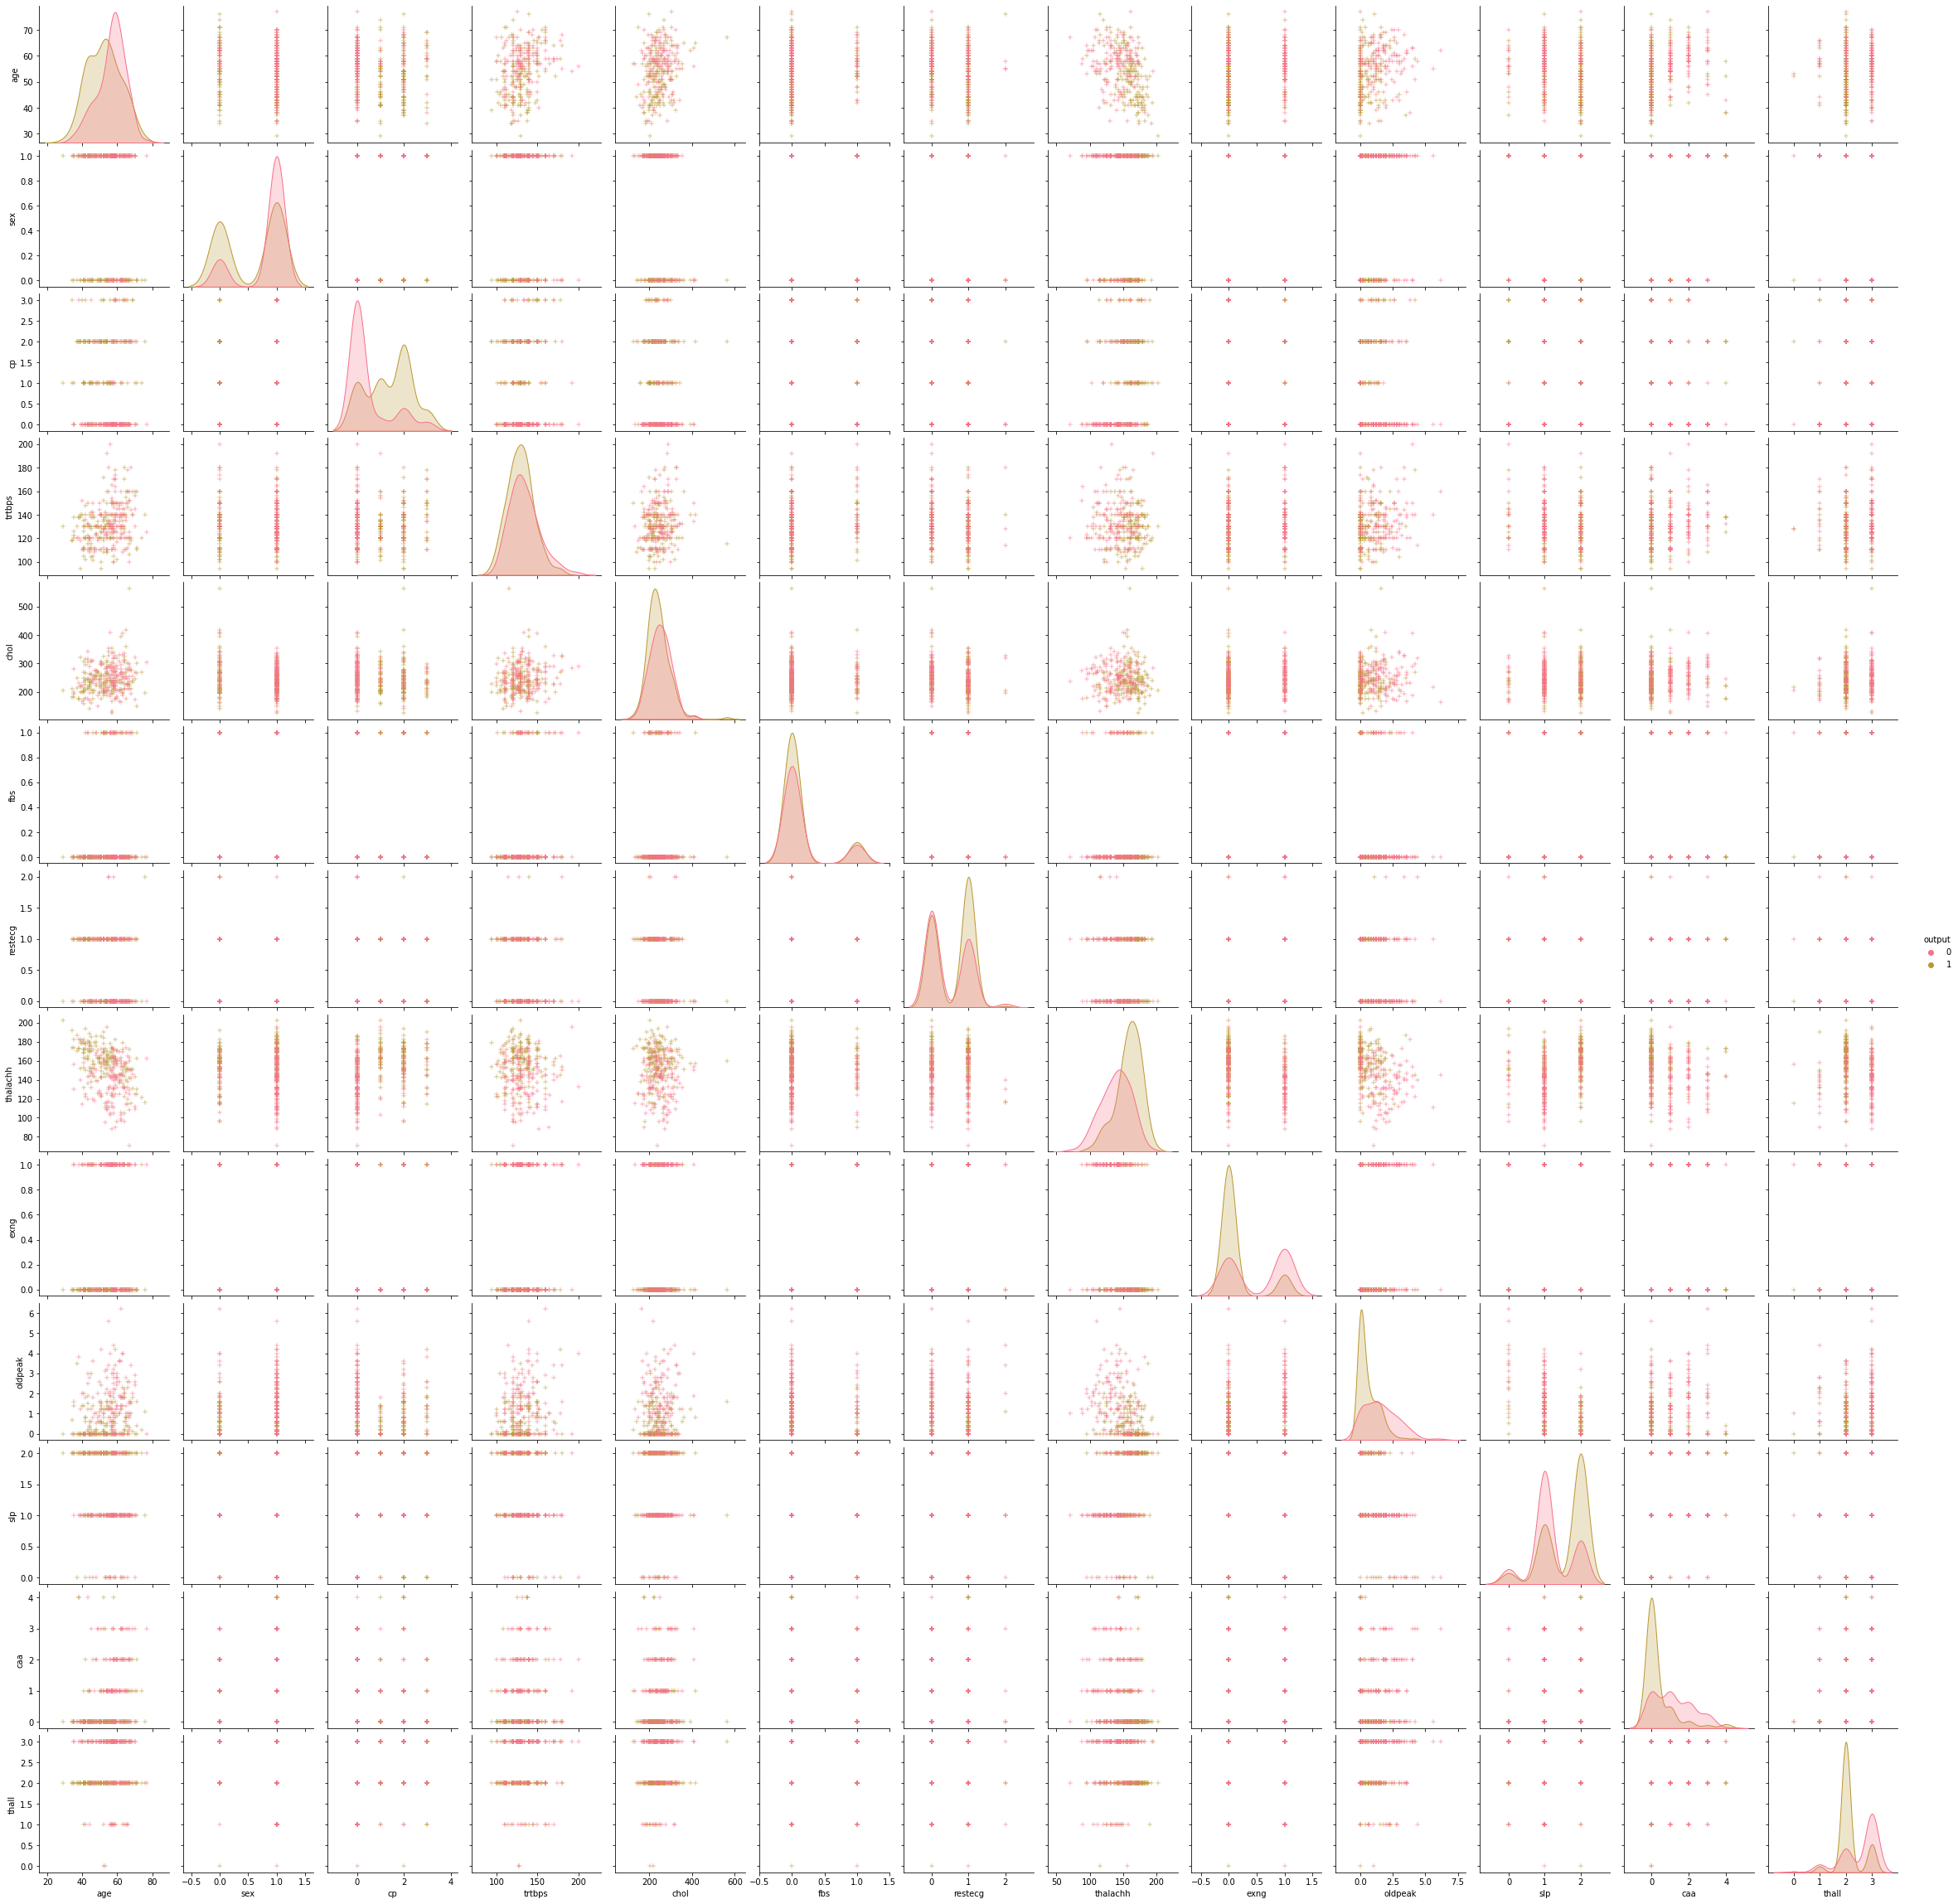

In [8]:
g = sns.pairplot(data, hue='output', markers='+')
plt.show()

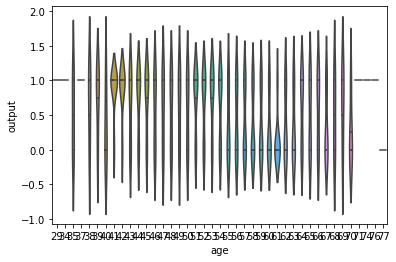

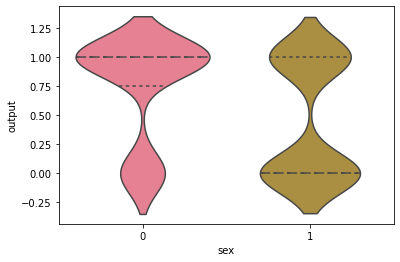

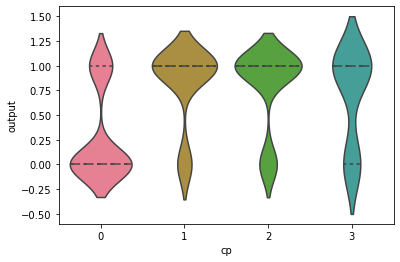

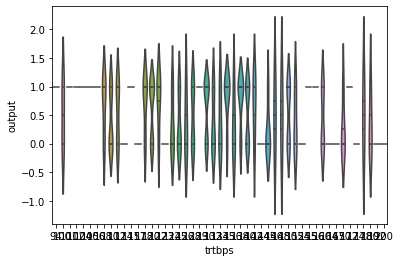

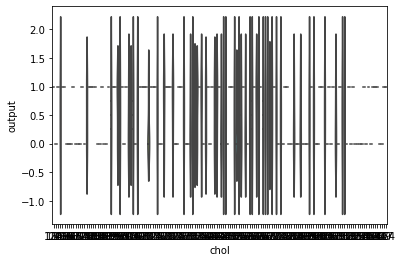

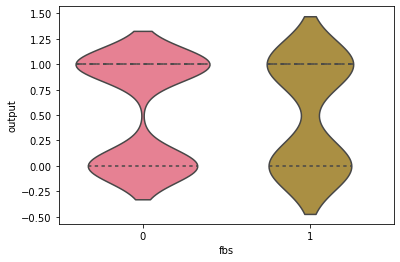

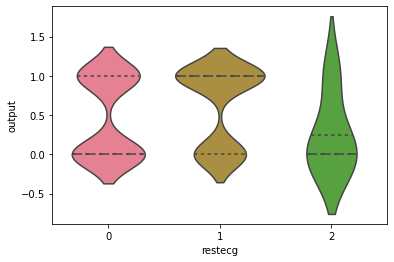

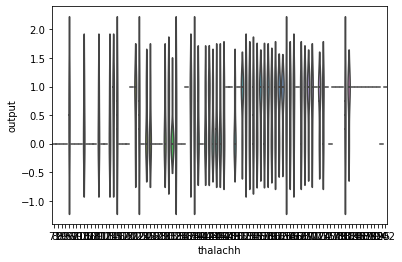

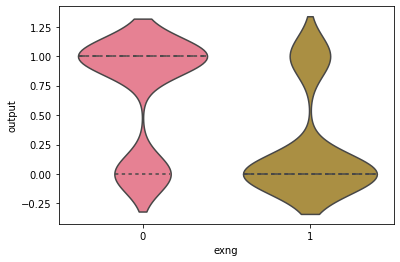

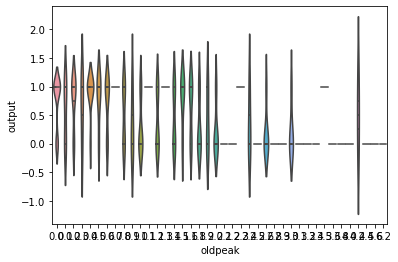

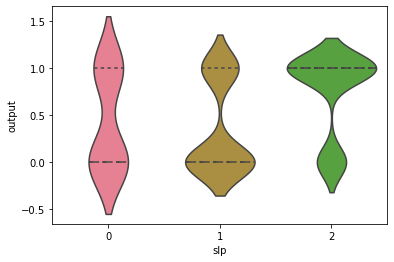

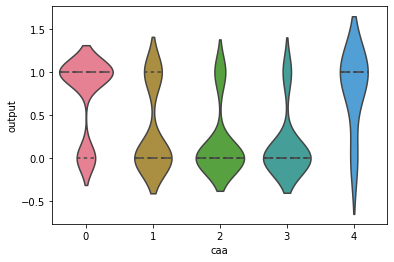

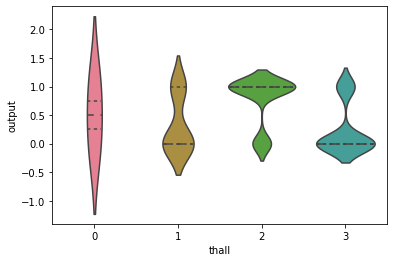

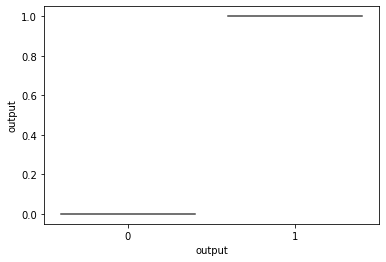

In [9]:
for col in data.columns:
    g = sns.violinplot(y='output', x=col, data=data, inner='quartile')
    plt.show()

In [10]:
X = data.drop(['output'], axis=1)
y = data['output']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(303, 13)
(303,)


In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

num_cols = [x for x in data.columns if x!='output']
num_cols

['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall']

In [13]:
# apply standardization on numerical features
X_train = xtrain.copy()
X_test = xtest.copy()

for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(xtrain[[i]])
    
    # transform the training data column
    X_train[i] = scale.transform(xtrain[[i]])
    
    # transform the testing data column
    X_test[i] = scale.transform(xtest[[i]])

In [14]:
lsvc = LinearSVC(verbose=0)
print(lsvc)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

LinearSVC()


LinearSVC()

In [15]:
lsvc.fit(X_train, ytrain)
y_preda = lsvc.predict(X_test)
print(metrics.accuracy_score(ytest, y_preda))

0.881578947368421


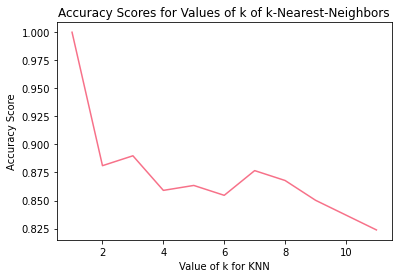

In [16]:
k_range = list(range(1,12))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, ytrain)
    y_pred = knn.predict(X_train)
    scores.append(metrics.accuracy_score(ytrain, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [17]:
logreg = LogisticRegression()
logreg.fit(X_train, ytrain)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(ytest, y_pred))

0.881578947368421


In [18]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, ytrain)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(ytest, y_pred))

0.7894736842105263


In [19]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(X_train, ytrain)
ypred = clf.predict(X_test)
print(metrics.accuracy_score(ytest, ypred))

0.8289473684210527


In [20]:
print(classification_report(ytest, ypred))


              precision    recall  f1-score   support

           0       0.81      0.83      0.82        35
           1       0.85      0.83      0.84        41

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv = 5)

# fitting the model for grid search
grid.fit(X_train, ytrain)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.543 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.543 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.533 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.556 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.556 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.804 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.761 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.689 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.733 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.822 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.717 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [22]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.0001)


In [23]:
ypred = grid.predict(X_test)
print(metrics.accuracy_score(ytest, ypred))

0.8552631578947368


In [24]:
n = y.shape
model = SGDClassifier(penalty='elasticnet',max_iter = 1000,shuffle=True,random_state=42,early_stopping=True)
param_grid = [{'alpha' : 10.0**-np.arange(1,7),'l1_ratio':[.05, .15, .5, .7, .9, .95, .99, 1]}]
gs = GridSearchCV(model,param_grid,n_jobs=8,verbose=1, cv=5)
gs.fit(X_train, ytrain)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=SGDClassifier(early_stopping=True, penalty='elasticnet',
                                     random_state=42),
             n_jobs=8,
             param_grid=[{'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]),
                          'l1_ratio': [0.05, 0.15, 0.5, 0.7, 0.9, 0.95, 0.99,
                                       1]}],
             verbose=1)

In [25]:
# print best parameter after tuning
print(gs.best_params_)

# print how our model looks after hyper-parameter tuning
print(gs.best_estimator_)


{'alpha': 0.01, 'l1_ratio': 0.5}
SGDClassifier(alpha=0.01, early_stopping=True, l1_ratio=0.5,
              penalty='elasticnet', random_state=42)


In [26]:
grid_predictions = gs.predict(X_test)
 
# print classification report
print(classification_report(ytest, grid_predictions))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        35
           1       0.84      0.88      0.86        41

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



In [27]:
print(gs.best_score_)


0.8104347826086956


In [28]:
model1 = SGDClassifier(alpha=0.01, early_stopping=True, l1_ratio=0.5,
              penalty='l1', random_state=34)
model1.fit(X_train, ytrain)
ypred = gs.predict(X_test)
print(metrics.accuracy_score(ytest, ypred))

0.8421052631578947


In [29]:
from tpot import TPOTClassifier

param_grid = { 'loss' : ['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'alpha' : 10.0**-np.arange(1,7),
    'l1_ratio':[.05, .15, .5, .7, .9, .95, .99, 1], 'max_iter': list(np.linspace(900, 1200, 10, dtype = int)) + [None],
    'epsilon': [0.001, 0.01, .1] , 'n_jobs': [-1] ,'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'], 'early_stopping': [True]  }

               
tpot_clf = TPOTClassifier(generations= 10, population_size= 24, offspring_size= 12,
                                 verbosity= 2,
                                 config_dict=
                                 {'sklearn.linear_model.SGDClassifier': param_grid}, 
                                 cv = 4, scoring = 'accuracy')
tpot_clf.fit(X_train,ytrain) 

Optimization Progress:   0%|          | 0/144 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8151629072681704

Generation 2 - Current best internal CV score: 0.8151629072681704

Generation 3 - Current best internal CV score: 0.8283208020050125

Generation 4 - Current best internal CV score: 0.8283208020050125

Generation 5 - Current best internal CV score: 0.8283208020050125

Generation 6 - Current best internal CV score: 0.8283208020050125

Generation 7 - Current best internal CV score: 0.8283208020050125

Generation 8 - Current best internal CV score: 0.8283208020050125

Generation 9 - Current best internal CV score: 0.8283208020050125

Generation 10 - Current best internal CV score: 0.8283208020050125

Best pipeline: SGDClassifier(CombineDFs(input_matrix, input_matrix), alpha=0.1, early_stopping=True, epsilon=0.1, l1_ratio=0.99, learning_rate=optimal, loss=hinge, max_iter=1066, n_jobs=-1)


TPOTClassifier(config_dict={'sklearn.linear_model.SGDClassifier': {'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]),
                                                                   'early_stopping': [True],
                                                                   'epsilon': [0.001,
                                                                               0.01,
                                                                               0.1],
                                                                   'l1_ratio': [0.05,
                                                                                0.15,
                                                                                0.5,
                                                                                0.7,
                                                                                0.9,
                                                                                0.95,
     

In [30]:
acc6 = tpot_clf.score(X_test,ytest)
print(acc6)
pred = tpot_clf.predict(X_test)
print(classification_report(ytest, pred))

0.8947368421052632
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        35
           1       0.90      0.90      0.90        41

    accuracy                           0.89        76
   macro avg       0.89      0.89      0.89        76
weighted avg       0.89      0.89      0.89        76

